In [23]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import os 
import numpy as np 
from datetime import datetime


In [32]:
#path='https://raw.githubusercontent.com/vikrambj2019/basic/master/Data/'
path ='C:/Users/Vikram.Bandugula/Downloads/'
filename_read = os.path.join(path,"TestdataTableau_v1.xlsx")
df = pd.read_excel(filename_read, sheet_name='rawdata')

In [33]:
df.head()

,Month,Custumer Name,Customer Group,Product,City,Sales_amt,Standard_Cost,Metal_Cost,Taxes,FreightUnrecovered,Metal_weight_CU
0,2/1/2017,* SUMMIT ELECTRIC SUPPLY,Medium,CSt,Sacramento,199.44,93.0974,68.5374,9.234072,4.4096,22.0704
1,2/1/2018,* SPRINGFIELD ELECTRIC SUPPLY,Large,CST,El Monte,767.00,283.5617,151.2411,25.387700,10.4405,48.7026
2,6/1/2017,* NU-LITE ELECTRICAL WHLSRS,little,CST,Salt Lake City,122.25,85.0163,49.3526,4.132050,6.8984,15.8925
3,6/1/2017,* MICK ELECTRIC COMPANY,little,CST,Eugene,569.56,270.6263,163.6132,20.618072,7.1545,52.6867
4,4/1/2017,* FRANKLIN ELECTRIC COMPANY,Medium,CST,San Diego,3217.20,1629.5767,1092.8027,147.991200,-31.4172,351.9040


In [34]:
df.dtypes

Month                  object
Custumer Name          object
Customer Group         object
Product                object
City                   object
Sales_amt             float64
Standard_Cost         float64
Metal_Cost            float64
Taxes                 float64
FreightUnrecovered    float64
Metal_weight_CU       float64
dtype: object

In [35]:
df['Month'] =  pd.to_datetime(df['Month']) #apply(pd.to_datetime)

In [37]:
#df[df['horsepower'].isnull()]
df[df['Month'].isnull()]

,Month,Custumer Name,Customer Group,Product,City,Sales_amt,Standard_Cost,Metal_Cost,Taxes,FreightUnrecovered,Metal_weight_CU


In [40]:
for i in df.columns:
    print (df[i][0])

2017-02-01 00:00:00
* SUMMIT ELECTRIC SUPPLY
Medium
CSt
 Sacramento
199.44
93.0974
68.5374
9.234072
4.4096
22.0704


In [55]:
def missingvaluesDf(df):   
    for i in df.columns:
        print (df[df[i].isnull()])
    return None

In [56]:
missingvaluesDf(df)


Empty DataFrame
Columns: [Month, Custumer Name, Customer Group, Product, City, Sales_amt, Standard_Cost, Metal_Cost, Taxes, FreightUnrecovered, Metal_weight_CU]
Index: []
Empty DataFrame
Columns: [Month, Custumer Name, Customer Group, Product, City, Sales_amt, Standard_Cost, Metal_Cost, Taxes, FreightUnrecovered, Metal_weight_CU]
Index: []
Empty DataFrame
Columns: [Month, Custumer Name, Customer Group, Product, City, Sales_amt, Standard_Cost, Metal_Cost, Taxes, FreightUnrecovered, Metal_weight_CU]
Index: []
Empty DataFrame
Columns: [Month, Custumer Name, Customer Group, Product, City, Sales_amt, Standard_Cost, Metal_Cost, Taxes, FreightUnrecovered, Metal_weight_CU]
Index: []
Empty DataFrame
Columns: [Month, Custumer Name, Customer Group, Product, City, Sales_amt, Standard_Cost, Metal_Cost, Taxes, FreightUnrecovered, Metal_weight_CU]
Index: []
Empty DataFrame
Columns: [Month, Custumer Name, Customer Group, Product, City, Sales_amt, Standard_Cost, Metal_Cost, Taxes, FreightUnrecovered, M

In [115]:
def uniqueValuesColumns(df):
    a=[]
    b=[]
    c=[]
    for i in df.columns:
        x=len(df[i].value_counts())
        a.append(x)
    b=list(df.columns.values)
    #c=[]
    for i in range(len(a)):
        c.append([b[i],a[i]])
    return c
    
        
        

In [116]:
c=uniqueValuesColumns(df)
c

[['Month', 12],
 ['Custumer Name', 180],
 ['Customer Group', 4],
 ['Product', 4],
 ['City', 191],
 ['Sales_amt', 843],
 ['Standard_Cost', 849],
 ['Metal_Cost', 809],
 ['Taxes', 892],
 ['FreightUnrecovered', 611],
 ['Metal_weight_CU', 747]]

In [120]:
df['Product'].unique()

array(['CSt', 'CST', 'RST', 'MST'], dtype=object)

In [131]:
df.loc[df['Product'].isin(['CST','CSt'])]

,Month,Custumer Name,Customer Group,Product,City,Sales_amt,Standard_Cost,Metal_Cost,Taxes,FreightUnrecovered,Metal_weight_CU
0,2017-02-01,* SUMMIT ELECTRIC SUPPLY,Medium,CSt,Sacramento,199.44,93.0974,68.5374,9.234072,4.4096,22.0704
1,2018-02-01,* SPRINGFIELD ELECTRIC SUPPLY,Large,CST,El Monte,767.00,283.5617,151.2411,25.387700,10.4405,48.7026
2,2017-06-01,* NU-LITE ELECTRICAL WHLSRS,little,CST,Salt Lake City,122.25,85.0163,49.3526,4.132050,6.8984,15.8925
3,2017-06-01,* MICK ELECTRIC COMPANY,little,CST,Eugene,569.56,270.6263,163.6132,20.618072,7.1545,52.6867
4,2017-04-01,* FRANKLIN ELECTRIC COMPANY,Medium,CST,San Diego,3217.20,1629.5767,1092.8027,147.991200,-31.4172,351.9040
5,2018-02-01,* CRESCENT ELECTRIC SUPPLY,Large,CST,Virginia Beach,574.00,226.7101,131.6069,20.319600,2.3405,42.3800
6,2017-02-01,* CRESCENT ELECTRIC SUPPLY,Large,CST,Oakland,1285.12,752.4630,162.4174,78.392320,20.6721,52.3016
7,2017-01-01,* CHANCELLOR ELECTRICAL SUPPLY,small,CST,Mesquite,75.00,53.7496,28.4815,2.595000,0.0000,9.1716
8,2018-04-01,# KILOWATTS ELECTRIC SPLY 8150,small,CST,Fort Worth,382.92,267.1275,133.7235,13.899996,17.4184,43.0616
9,2017-01-01,# DOVER ELECTRIC SUPPLY #1275,small,CST,Plano,140.40,54.6661,25.3177,5.545800,1.5958,8.1528


In [137]:
df['Product'].value_counts()

CST    627
RST    166
MST    100
Name: Product, dtype: int64

In [136]:
df.loc[df['Product'] == 'CSt', 'Product'] = 'CST'

In [140]:
df['Customer Group'].unique()

array(['Medium', 'Large', 'small'], dtype=object)

In [139]:
df.loc[df['Customer Group'] == 'little', 'Customer Group'] = 'small'

In [141]:
df.describe()

,Sales_amt,Standard_Cost,Metal_Cost,Taxes,FreightUnrecovered,Metal_weight_CU
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,3557.293970,1714.740605,1340.488746,192.358307,48.470035,326.927649
std,23361.990876,8702.574372,14154.027769,1460.329211,141.738888,1730.293308
min,5.227200,0.602725,0.551254,0.178248,-357.301000,0.301632
25%,285.840000,128.544000,74.706600,14.083144,0.000000,22.991100
50%,688.500000,325.263300,195.450500,32.053476,5.873600,59.590400
75%,2143.720000,1103.862600,598.909500,96.921794,41.444200,201.088000
max,633951.840000,196409.571000,412754.887800,39938.965920,2489.000000,44963.875200


In [142]:
df['Margin']=df['Sales_amt']-df['Standard_Cost']-df['Metal_Cost']-df['Taxes']-df['FreightUnrecovered']

In [144]:
round(df.describe(),2)

,Sales_amt,Standard_Cost,Metal_Cost,Taxes,FreightUnrecovered,Metal_weight_CU,Margin
count,893.00,893.00,893.00,893.00,893.00,893.00,893.00
mean,3557.29,1714.74,1340.49,192.36,48.47,326.93,261.24
std,23361.99,8702.57,14154.03,1460.33,141.74,1730.29,3222.09
min,5.23,0.60,0.55,0.18,-357.30,0.30,-39275.97
25%,285.84,128.54,74.71,14.08,0.00,22.99,-13.07
50%,688.50,325.26,195.45,32.05,5.87,59.59,73.39
75%,2143.72,1103.86,598.91,96.92,41.44,201.09,285.50
max,633951.84,196409.57,412754.89,39938.97,2489.00,44963.88,42119.14


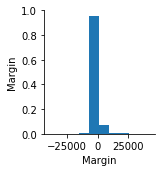

In [147]:
import seaborn as sns
#sns.pairplot(df.loc[:,df.dtypes=='float64'])
column_need=['Margin','Sales_amt','Standard_Cost','Metal_Cost','Taxes','FreightUnrecovered','Metal_weight_CU']
column_need=['Margin']
sns.pairplot(df[column_need])

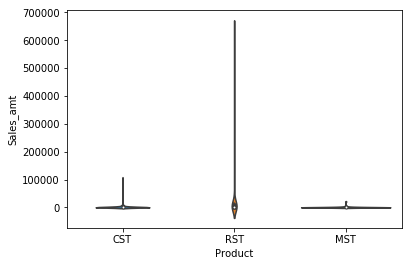

In [149]:
sns.violinplot(x="Product",y="Sales_amt",data=df)

In [168]:
a=df.groupby(['Product'])[['Margin']].sum()
a.max()


Margin    116169.407139
dtype: float64

In [171]:
a=df.groupby('Product', as_index=False).agg({"Margin": "sum"})
a

,Product,Margin
0,CST,104195.505211
1,MST,12919.084353
2,RST,116169.407139


In [176]:
s = a.loc[a['Margin'].argmax()]

res = (s.iloc[0],s.iloc[1])
res

C:\Users\Vikram.Bandugula\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


('RST', 116169.40713900003)

In [221]:

def getTopValues(df,measure,columns,top):
    #a=df.groupby(columns, as_index=False).agg({measure: "sum"})
    s = pd.DataFrame(df[measure].groupby(df[columns]).sum().nlargest(top))
    
    #s = a.loc[a[measure].values.argmax()]
    #res = (s.iloc[0],s.iloc[1])
    return s
    

In [223]:
measure='Margin'
columns='City'
getTopValues(df,measure,columns,10)

,Margin
City,
Colorado Springs,42818.517164
Naperville,35305.168942
Oceanside,31715.154556
Savannah,27368.595882
Fort Lauderdale,24029.650466
Santa Rosa,19340.119369
Baton Rouge,14095.897572
Grand Prairie,13088.668266
New Orleans,9518.464012


In [271]:
df_budget = pd.read_excel(filename_read, sheet_name='BudgetPlan2018')

In [272]:
df_budget.head()
df_budget['Month'] =  pd.to_datetime(df_budget['Month']) #apply(pd.to_datetime)
df_budget['MonthToJoin'] =  pd.to_datetime(df_budget['MonthToJoin']) #apply(pd.to_datetime)
df_budget.describe()

,Sales_amt,Standard_Cost,Metal_Cost,Taxes,FreightUnrecovered,Metal_weight_CU
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.050590,0.052380,0.044388,0.052457,0.054673,0.054567
std,0.026299,0.029425,0.024198,0.025942,0.030924,0.024212
min,0.011400,0.010300,0.010200,0.010300,0.012200,0.012900
25%,0.028400,0.023600,0.021400,0.031900,0.024100,0.032900
50%,0.042300,0.052400,0.041300,0.053500,0.055000,0.059700
75%,0.074700,0.078900,0.059700,0.075300,0.086200,0.075900
max,0.098500,0.097800,0.099800,0.095500,0.099800,0.094900


In [281]:
df_budget.head()

,MonthToJoin,Month_x,Customer Group,Product,Sales_amt_x,Standard_Cost_x,Metal_Cost_x,Taxes_x,FreightUnrecovered_x,Metal_weight_CU_x,Month_y,Custumer Name,City,Sales_amt_y,Standard_Cost_y,Metal_Cost_y,Taxes_y,FreightUnrecovered_y,Metal_weight_CU_y,Margin
0,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,GRAYBAR ELECTRIC COMPANY,Garland,371.36,265.5481,182.7683,12.997600,26.5033,58.8550,-116.457300
1,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,"KGP TELECOMMUNICATIONS, INC",Austin,276.60,125.1853,91.9546,16.374720,0.0000,29.6112,43.085380
2,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,- KENDALL ELECTRIC INC,Oceanside,7104.14,4154.1901,2293.6354,297.663466,88.6609,738.5959,269.990134
3,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,GRAYBAR ELECTRIC COMPANY,Nashville-Davidson,244.56,169.1161,46.2307,11.103024,1.4308,14.8872,16.679376
4,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,* SPRINGFIELD ELECTRIC SUPPLY,Birmingham,222.50,95.5549,63.2940,15.486000,4.0601,20.6850,44.105000


In [280]:
include = df[df['Month'].dt.year == 2017]
len(include)

425

In [274]:
df_budget=pd.merge(df_budget,df,how='inner',left_on=['MonthToJoin','Customer Group','Product'],right_on=['Month','Customer Group','Product'])

In [275]:
df_budget.head(-100)
#df.describe()

,MonthToJoin,Month_x,Customer Group,Product,Sales_amt_x,Standard_Cost_x,Metal_Cost_x,Taxes_x,FreightUnrecovered_x,Metal_weight_CU_x,Month_y,Custumer Name,City,Sales_amt_y,Standard_Cost_y,Metal_Cost_y,Taxes_y,FreightUnrecovered_y,Metal_weight_CU_y,Margin
0,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,GRAYBAR ELECTRIC COMPANY,Garland,371.36,265.5481,182.7683,12.997600,26.5033,58.8550,-116.457300
1,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,"KGP TELECOMMUNICATIONS, INC",Austin,276.60,125.1853,91.9546,16.374720,0.0000,29.6112,43.085380
2,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,- KENDALL ELECTRIC INC,Oceanside,7104.14,4154.1901,2293.6354,297.663466,88.6609,738.5959,269.990134
3,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,GRAYBAR ELECTRIC COMPANY,Nashville-Davidson,244.56,169.1161,46.2307,11.103024,1.4308,14.8872,16.679376
4,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,* SPRINGFIELD ELECTRIC SUPPLY,Birmingham,222.50,95.5549,63.2940,15.486000,4.0601,20.6850,44.105000
5,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,GRAYBAR ELECTRIC COMPANY,Rochester,83.88,41.3332,30.7655,4.521132,0.0000,10.0544,7.260168
6,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,"KGP TELECOMMUNICATIONS, INC",Chicago,462.00,212.5115,155.1120,19.265400,0.0000,51.6816,75.111100
7,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,GENERAL SUPPLY AND SERVICES,San Bernardino,384.72,162.7110,99.6012,12.734232,0.0000,33.1860,109.673568
8,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,CED-CONSOLIDATED ELEC DIST,Aurora,920.04,525.9157,377.5682,62.010696,16.6126,125.8016,-62.067196
9,2017-01-01,2018-01-01,Large,CST,0.0306,0.0588,0.0441,0.0164,0.0355,0.0742,2017-01-01,WESCO DISTRIBUTION,Jersey City,11590.62,7400.7880,4887.1173,368.581716,220.1974,1597.1494,-1286.064416


In [276]:

df_budget.describe()

,Sales_amt_x,Standard_Cost_x,Metal_Cost_x,Taxes_x,FreightUnrecovered_x,Metal_weight_CU_x,Sales_amt_y,Standard_Cost_y,Metal_Cost_y,Taxes_y,FreightUnrecovered_y,Metal_weight_CU_y,Margin
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,0.048238,0.049124,0.044542,0.046618,0.055491,0.059360,3518.726463,1841.501999,1107.840112,186.403030,50.168519,316.179471,332.812804
std,0.023814,0.027656,0.024192,0.024462,0.027999,0.021545,13229.438405,7821.962352,4382.159400,804.734874,122.510082,1072.234099,3979.958519
min,0.011400,0.010300,0.010200,0.010300,0.012200,0.012900,5.227200,0.602725,2.454936,0.178248,-282.754800,0.588544,-39275.970572
25%,0.030600,0.020200,0.019000,0.021000,0.026100,0.047900,286.240000,131.104100,78.057300,13.558176,0.000000,24.526600,-22.991266
50%,0.038500,0.047000,0.044100,0.048900,0.055000,0.062800,702.240000,346.310300,200.477300,31.592376,6.311000,59.590400,61.318808
75%,0.067900,0.067500,0.061500,0.064700,0.088200,0.077200,2419.360000,1148.449800,658.539500,116.545770,46.239500,202.539200,269.322328
max,0.098100,0.097800,0.099800,0.095500,0.099800,0.094900,215368.000000,128900.465000,59783.119200,13675.868000,1056.316000,14987.958400,42119.135884


In [241]:
df_budget['Sales_amt_budget']=df_budget['Sales_amt_x']*(1+df_budget['Sales_amt_y'])
df_budget['Standard_Cost_budget']=df_budget['Standard_Cost_x']*(1+df_budget['Standard_Cost_y'])
df_budget['Metal_Cost_budget']=df_budget['Metal_Cost_x']*(1+df_budget['Metal_Cost_y'])
df_budget['Taxes_budget']=df_budget['Taxes_x']*(1+df_budget['Taxes_y'])
df_budget['FreightUnrecovered_budget']=df_budget['FreightUnrecovered_x']*(1+df_budget['FreightUnrecovered_y'])
df_budget['Margin_budget']=df_budget['Sales_amt_budget']-df_budget['Standard_Cost_budget']-df_budget['Metal_Cost_budget']-df_budget['Taxes_budget']-df_budget['FreightUnrecovered_budget']

In [254]:
columns_needed=['MonthToJoin','Customer Group','Product','Sales_amt_budget','Standard_Cost_budget','Metal_Cost_budget','Taxes_budget','FreightUnrecovered_budget','Margin_budget']
df1=pd.merge(df,df_budget[columns_needed],how='left',left_on=['Month','Customer Group','Product'],right_on=['MonthToJoin','Customer Group','Product'])

In [244]:
columns_needed

['Sales_amt_budget',
 'Standard_Cost_budget',
 'Metal_Cost_budget',
 'Taxes_budget',
 'FreightUnrecovered_budget',
 'Margin_budget']

In [256]:
df1.head()

,Month,Custumer Name,Customer Group,Product,City,Sales_amt,Standard_Cost,Metal_Cost,Taxes,FreightUnrecovered,Metal_weight_CU,Margin,MonthToJoin,Sales_amt_budget,Standard_Cost_budget,Metal_Cost_budget,Taxes_budget,FreightUnrecovered_budget,Margin_budget
0,2017-02-01,* SUMMIT ELECTRIC SUPPLY,Medium,CST,Sacramento,199.44,93.0974,68.5374,9.234072,4.4096,22.0704,24.161528,2017-02-01,211.865112,98.655315,72.217858,9.973721,4.673735,26.344483
1,2017-02-01,* SUMMIT ELECTRIC SUPPLY,Medium,CST,Sacramento,199.44,93.0974,68.5374,9.234072,4.4096,22.0704,24.161528,2017-02-01,3202.494564,1397.546984,846.225416,111.360531,139.791377,707.570256
2,2017-02-01,* SUMMIT ELECTRIC SUPPLY,Medium,CST,Sacramento,199.44,93.0974,68.5374,9.234072,4.4096,22.0704,24.161528,2017-02-01,1007.017908,537.922901,382.491309,70.034185,33.736723,-17.167209
3,2017-02-01,* SUMMIT ELECTRIC SUPPLY,Medium,CST,Sacramento,199.44,93.0974,68.5374,9.234072,4.4096,22.0704,24.161528,2017-02-01,1236.156018,683.014481,454.235424,61.209528,52.750163,-15.053578
4,2017-02-01,* SUMMIT ELECTRIC SUPPLY,Medium,CST,Sacramento,199.44,93.0974,68.5374,9.234072,4.4096,22.0704,24.161528,2017-02-01,216.751692,132.405170,93.063943,9.057766,3.082613,-20.857801


In [257]:
df1.describe()

,Sales_amt,Standard_Cost,Metal_Cost,Taxes,FreightUnrecovered,Metal_weight_CU,Margin,Sales_amt_budget,Standard_Cost_budget,Metal_Cost_budget,Taxes_budget,FreightUnrecovered_budget,Margin_budget
count,7577.000000,7577.000000,7577.000000,7577.000000,7577.000000,7577.000000,7577.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000
mean,3202.189932,1682.827658,1053.751441,167.299386,44.107261,300.826906,254.204185,3316.356995,1776.973283,1069.327116,174.308545,46.654776,249.093275
std,14196.014031,7586.393205,6286.275389,866.828157,104.712376,1190.476309,2857.942306,12975.039535,7974.888456,4469.342477,814.073757,106.880528,2876.271971
min,5.227200,0.602725,0.551254,0.178248,-357.301000,0.301632,-39275.970572,5.334358,0.611223,2.546505,0.194325,-307.919977,-41178.185688
25%,312.480000,137.523400,81.339700,15.096240,0.000000,25.748800,-5.854098,325.327860,146.340939,84.279261,15.728736,0.000000,-3.794066
50%,702.240000,339.411300,188.642000,30.891132,6.072600,62.055000,69.998375,723.564268,353.702461,196.929285,31.985242,6.390519,72.099518
75%,2359.260000,1115.518500,658.495100,110.751840,46.239500,212.048400,255.421300,2446.049400,1165.561702,676.845200,119.747212,50.225345,270.008803
max,633951.840000,196409.571000,412754.887800,39938.965920,2489.000000,44963.875200,42119.135884,220644.516000,141416.700152,61917.376555,14769.937440,1115.364064,42272.640225
